In [2]:
import xml.etree.ElementTree as etree
import random, math
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
#import simpy
import scipy.optimize as op
import time
import pymc3 as pm 
import pandas as pd
import theano.tensor as tt
import seaborn as sb

/Users/tortysivill/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
SEED = [20100425, 20100234]


data_ids = []
tester_ids = []
level_ids = []
contexts = []
left_obstacles = []
right_obstacles = []
start_lane = []
decisions = []
gender_ids = []
gender = []

j = 0

In [4]:
for i in range(0,100):
    tree = etree.parse('log'+ str(i) + '.xml')
    root = tree.getroot()
    for child in root:
        if child.find('stagetype') == None:
            continue
        elif child.find('stagetype').text == 'trial':
            data_ids.append(j)
            tester_ids.append(i)
            level_ids.append(child.find('trialdescription').text)
            contexts.append(child.find('level').text)
            left_obstacles.append(child.find('leftobstacles').text)
            right_obstacles.append(child.find('rightobstacles').text)
            start_lane.append(child.find('startlane').text)
            decisions.append(child.find('answer').text)
            j += 1
        elif child.find('stagetype').text == 'q01':
            if child.find('displaytext-en').text == 'Please indicate your sex.':
                gender_ids.append(i)
                gender.append(child.find('answer').text)


In [5]:
data = []

print(len(data_ids))
x = 0
for i in range(0,100):
    data.append([])

for i in range(0,len(data_ids)):
    
    print(contexts[i])
    print(left_obstacles[i])
    print(right_obstacles[i])
    print("###############")
    
    left_self_value = 0
    left_old_value = 0
    left_young_value = 0
    left_man_value = 0
    left_kneeling_value = 0
    left_pavement_value = 0
    
    right_self_value = 0
    right_old_value = 0
    right_young_value = 0
    right_man_value = 0
    right_kneeling_value = 0
    right_pavement_value = 0
    
    switch_self_value = 0
    switch_old_value = 0
    switch_young_value = 0
    switch_man_value = 0
    switch_kneeling_value = 0
    switch_pavement_value = 0
    
    stay_self_value = 0
    stay_old_value = 0
    stay_young_value = 0
    stay_man_value = 0
    stay_kneeling_value = 0
    stay_pavement_value = 0
    
    
    choice = 0 
    result = []
    if contexts[i] == "mountain":
        print("in mountain")
        ### left obstacle:
        
        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = 1
            left_kneeling_value = 0
            left_pavement_value = 0
        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,0]
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = int(man_number)
            left_kneeling_value = 0
            left_pavement_value = 0
        level = level_ids[i].split('.')
        if level[0] == '2':
            #right = [1,0,0,0,0,0]
            print("in self")
            right_self_value = 1

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right_man_value = [0,0,0,1,0,0]
                right_man_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                right_man_value = int(man_number)


    elif contexts[i] == "cityr":
        print("in cityr")
        man_boy = left_obstacles[i][0]
        if man_boy == "b":
            boy_var = left_obstacles[i].split('y')
            if boy_var[1] == ",":
                #left = [0,0,1,0,0,0]
                left_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #left = [0,0,int(boy_number),0,0,0]
                left_young_value = int(boy_number)
        else:
            man_var = left_obstacles[i].split('n')
            if man_var[1] == ",":
                #left = [0,0,0,1,0,0]
                left_man_value = 1
            else:
                man_number = man_var[1][0]
                #left = [0,0,0,int(man_number),0,0]
                #left = [0,0,0,1,0,0]
                left_man_value = int(man_number)

        man_var = right_obstacles[i].split('n')
        if man_var[1] == ",":
            #right = [0,0,0,1,0,1]
            right_man_value = 1
            right_pavement_value = 1
        else:
            man_number = man_var[1][0]
            #right = [0,0,0,1,0,1]
            right_man_value = int(man_number)
            right_pavement_value = 1


    elif contexts[i] == "cityl":
        print("in cityl")
        man_boy = right_obstacles[i][0]
        if man_boy == "b":
            boy_var = right_obstacles[i].split('y')
            if boy_var[1] == ",":
                #right = [0,0,1,0,0,0]
                right_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #right = [0,0,int(boy_number),0,0,0]
                #right = [0,0,1,0,0,0]
                right_young_value = int(boy_number)

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right = [0,0,0,1,0,0]
                right_pavement_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                #right = [0,0,0,1,0,0]
                right_man_value = int(man_number)

        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            #left = [0,0,0,1,0,1]
            left_man_value = 1
            left_pavement_value = 1

        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,1]	
            #left = [0,0,0,1,0,1]
            left_man_value = int(man_number)
            left_pavement_value = 1	
    else:
        print("in suburb")
        if left_obstacles[i] == "boy,":
            #left = [0,0,1,0,0,0]
            left_young_value = 1
        elif left_obstacles[i] == "oldman,":
            #eft = [0,1,0,0,0,0]
            left_old_value = 1
        elif left_obstacles[i] == "kneelingman,":
            #eft = [0,0,0,0,1,0]
            left_kneeling_value = 1
        elif left_obstacles[i] == "man,":
            #left = [0,0,0,1,0,0]
            left_man_value = 1

        if right_obstacles[i] == "boy,":
            #right = [0,0,1,0,0,0]
            right_young_value = 1
        elif right_obstacles[i] == "oldman,":
            #right = [0,1,0,0,0,0]
            right_old_value = 1
        elif right_obstacles[i] == "kneelingman,":
            #right = [0,0,0,0,1,0]
            right_kneeling_value = 1
        elif right_obstacles[i] == "man,":
            #right = [0,0,0,1,0,0]
            right_man_value = 1


    ###### switch = 1 stay = 0      
    if(decisions[i] == "right"):
        if start_lane[i] == "left":
            choice = 1
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 0
            
                
            switch_self_value = left_self_value
            switch_old_value = left_old_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value
            
            
    else:
        if start_lane[i] == "left":
            choice = 0
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 1
            
            switch_old_value = left_old_value
            switch_self_value = left_self_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value

    """result.append(data_ids[i])
    result.append(tester_ids[i])
    result.append(left)
    result.append(right)
    result.append(choice)"""
    
    if tester_ids[i] in gender_ids:
        
        if tester_ids[i] == 0:
            print("hi")
        
        elif tester_ids[i - 1] != tester_ids[i]:
            x = x + 1
        


    

        result.append(x)

        #stay
        result.append(stay_self_value)
        result.append(stay_old_value)
        result.append(stay_young_value)
        result.append(stay_man_value)
        result.append(stay_kneeling_value)
        result.append(stay_pavement_value)

        #switch
        result.append(switch_self_value)
        result.append(switch_old_value)
        result.append(switch_young_value)
        result.append(switch_man_value)
        result.append(switch_kneeling_value)
        result.append(switch_pavement_value)

        result.append(choice)


        print("###############")


        data[tester_ids[i]].append(result)

2302
suburb
boy,
kneelingman,
###############
in suburb
hi
###############
cityl
man,
man5,
###############
in cityl
hi
###############
cityr
man2,
man,
###############
in cityr
hi
###############
suburb
man,
kneelingman,
###############
in suburb
hi
###############
mountain
man6,
empty,
###############
in mountain
in self
hi
###############
mountain
man2,
empty,
###############
in mountain
in self
hi
###############
mountain
man4,
empty,
###############
in mountain
in self
hi
###############
mountain
man,
man6,
###############
in mountain
hi
###############
cityr
boy2,
man,
###############
in cityr
hi
###############
cityr
man3,
man,
###############
in cityr
hi
###############
cityl
man2,
boy,
###############
in cityl
hi
###############
cityr
man4,
man,
###############
in cityr
hi
###############
cityr
boy,
man,
###############
in cityr
hi
###############
mountain
man3,
empty,
###############
in mountain
in self
hi
###############
mountain
man7,
empty,
###############
in mountain
in s

man4,
empty,
###############
in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man2,
man,
###############
in mountain
###############
cityr
man6,
man,
###############
in cityr
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityr
man3,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
cityl
man,
man2,
###############
in cityl
###############
suburb
boy,
oldman,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain


suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
man4,
###############
in cityl
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man4,
man,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
man,
oldman,
###############
in suburb
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
cityl
man2,
boy,
###############
in cityl
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man4,
man,
#############

###############
cityr
man3,
man,
###############
in cityr
###############
suburb
kneelingman,
man,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
man6,
man,
###############
in cityr
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man,
man2,
###############
in mountain
###############
cityl
man,
man2,
###############
in cityl
###############
cityr
boy,
man2,
###############
in cityr
###############
cityr
man7,
man,
###############
in cityr
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,

in mountain
in self
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
oldman,
boy,
###############
in suburb
###############
cityl
man,
man3,
###############
in cityl
###############
cityr
boy,
man2,
###############
in cityr
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man6,
man,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
cityl
man,
man2,
###############
in cityl
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
mountain
man6,
empty,
###############
in mountain
in self

man,
man6,
###############
in cityl
###############
cityl
man2,
boy,
###############
in cityl
###############
suburb
man,
kneelingman,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityl
man,
man7,
###############
in cityl
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man6,
empty,
###############
in mountain
in self
###############
cityr
man3,
man,
###############
in cityr
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
mountain
man,
man6,
###############
in mountain
###############
suburb
kneelingman,
oldman,
###############
in suburb
###############
mountain
man7,
empty,
###############
in mo

in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
suburb
kneelingman,
boy,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
cityl
man,
man3,
###############
in cityl
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
cityl
man2,
boy,
###############
in cityl
###############
cityl
man,
boy,
###############
in cityl
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
oldman,
boy,
###############
in suburb
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mounta

empty,
###############
in mountain
in self
###############
cityl
man,
man6,
###############
in cityl
###############
mountain
man,
man6,
###############
in mountain
###############
mountain
man,
man2,
###############
in mountain
###############
suburb
oldman,
man,
###############
in suburb
###############
cityr
man2,
man,
###############
in cityr
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
man4,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
suburb
oldman,
kneelingman,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
###############
in cityl
###############
mountain
man4,
man,
###############
in mountain
###############
mountain
man7,
empty,
###############
in mountain
in self
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
#########

man,
kneelingman,
###############
in suburb
###############
cityr
boy,
man,
###############
in cityr
###############
suburb
oldman,
boy,
###############
in suburb
###############
suburb
boy,
kneelingman,
###############
in suburb
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man2,
###############
in cityl
###############
suburb
man,
boy,
###############
in suburb
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
mountain
man3,
empty,
###############
in mountain
in self
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man5,
###############
in cityl
###############
cityr
boy2,
man,
###############
in cityr
###############
cityr
man7,
man,
###############
in cityr
###############
mountain
man2,
man,
###############
in mountain
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
cityr
man2,
man,
############

in cityr
###############
cityr
boy2,
man,
###############
in cityr
###############
mountain
man5,
empty,
###############
in mountain
in self
###############
cityr
boy,
man2,
###############
in cityr
###############
mountain
man,
man4,
###############
in mountain
###############
mountain
man2,
empty,
###############
in mountain
in self
###############
cityl
man,
man4,
###############
in cityl
###############
mountain
man4,
empty,
###############
in mountain
in self
###############
suburb
boy,
man,
###############
in suburb
###############
cityr
man2,
man,
###############
in cityr
###############
cityr
man5,
man,
###############
in cityr
###############
suburb
oldman,
man,
###############
in suburb
###############
suburb
man,
kneelingman,
###############
in suburb
###############
suburb
boy,
man,
###############
in suburb
###############
cityl
man,
boy2,
###############
in cityl
###############
mountain
man,
man2,
###############
in mountain
###############
cityr
boy,
man,
##############

In [6]:
data_orig = []

for i in range(0,len(data)):
    if data[i] == []:
        print(i)
        continue
    else:
        data_orig.append([])

x = 0

for i in range(0,len(data)):
    if data[i] == []:
        continue
    else:
        for j in data[i]:            
            data_orig[x].append(j)
        x = x + 1
    
for j in data_orig:
    print(j)

20
25
34
38
39
42
55
57
[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1], [0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 

In [7]:

print(len(gender))

print(len(data_orig))


man_data = []
woman_data = []

x = 0
y = 0

for j in range(0,len(data_orig)):
    if gender[j] == '1':
        for i in data_orig[j]:
            for k in i:
                
                if k == j:
                    man_data.append(x)
                else:
                    man_data.append(k)
        x = x + 1
    elif gender[j] == '0':
        for i in data_orig[j]:
            for k in i:
                if k == j:
                    woman_data.append(y)
                else:
                    woman_data.append(k)
        y = y + 1






print(man_data)

#man is 1 and woman is 0-

92
92
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [8]:
val = len(man_data)/14

new_data = np.array(man_data).reshape(int(val),14)


a = "t"
b = "stay_sv"
c = "stay_ov"
d = "stay_yv"
e = "stay_mv"
f = "stay_kv"
g = "stay_pv"

h = "switch_sv"
i = "switch_ov"
j = "switch_yv"
k = "switch_mv"
l = "switch_kv"
m = "switch_pv"
n = "c"

l = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]

df = pd.DataFrame(new_data, columns = l)


indiv_traces = {}



#c_data = df.loc[df['t'] == 0]
c_data = df
c_data = c_data.reset_index(drop=True)

stay_sv = c_data["stay_sv"]
stay_ov = c_data["stay_ov"]
stay_yv = c_data["stay_yv"]
stay_mv = c_data["stay_mv"]
stay_kv = c_data["stay_kv"]
stay_pv = c_data["stay_pv"]


switch_sv = c_data["switch_sv"]
switch_ov = c_data["switch_ov"]
switch_yv = c_data["switch_yv"]
switch_mv = c_data["switch_mv"]
switch_kv = c_data["switch_kv"]
switch_pv = c_data["switch_pv"]

choice = c_data["c"]

print(c_data)

n_testers = len(c_data['t'].unique())
#n_testers = 160
testers_idx = c_data['t'].values
n_tests = len(c_data['c'])
print(n_testers)

       t  stay_sv  stay_ov  stay_yv  stay_mv  stay_kv  stay_pv  switch_sv  \
0      0        0        0        1        0        0        0          0   
1      0        0        0        0        5        0        0          0   
2      0        0        0        0        2        0        0          0   
3      0        0        0        0        1        0        0          0   
4      0        1        0        0        0        0        0          0   
5      0        0        0        0        2        0        0          1   
6      0        0        0        0        4        0        0          1   
7      0        0        0        0        6        0        0          0   
8      0        0        0        2        0        0        0          0   
9      0        0        0        0        3        0        0          0   
10     0        0        0        1        0        0        0          0   
11     0        0        0        0        4        0        0          0   

In [9]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))


with pm.Model() as logistic_model:
    
    sd_dist = pm.Normal.dist(mu=1, sd=0.1, shape=(6))


    chol_packed = pm.LKJCholeskyCov('chol_packed', n=6, eta=2, sd_dist=sd_dist)
    chol = pm.expand_packed_triangular(6,chol_packed)
    cov = pm.Deterministic('cov', chol.dot(chol.T))
    sad = pm.Deterministic('sad', tt.sqrt(tt.diag(cov)))
    corr = pm.Deterministic('corr', tt.diag(sad**-1).dot(cov.dot(tt.diag(sad**-1))))
    
    chol_packed_group = pm.LKJCholeskyCov('chol_packed_group', n=6, eta=2, sd_dist=sd_dist)
    chol_group = pm.expand_packed_triangular(6,chol_packed_group)
    cov_group = pm.Deterministic('cov_group', chol_group.dot(chol_group.T))
    sad_group = pm.Deterministic('sad_group', tt.sqrt(tt.diag(cov_group)))
    corr_group = pm.Deterministic('corr_group', tt.diag(sad_group**-1).dot(cov_group.dot(tt.diag(sad_group**-1))))
    
    #chosen_sd = pm.HalfCauchy('chosen_sd', 10)
    #closer_sd = pm.HalfCauchy('closer_sd', 2.5)
    
    self_group_prior = pm.Normal('self_group_prior', mu=0.,sd=1)
    old_group_prior = pm.Normal('old_group_prior', mu=0.,sd=1)
    young_group_prior = pm.Normal('young_group_prior', mu=0.,sd=1)
    man_group_prior = pm.Normal('man_group_prior', mu=0.,sd=1)
    kneeling_group_prior = pm.Normal('kneeling_group_prior', mu=0.,sd=1)
    pavement_group_prior = pm.Normal('pavement_group_prior', mu=0.,sd=1)
    
    
    priors_raw = tt.concatenate([[self_group_prior], [old_group_prior], [young_group_prior], [man_group_prior], [kneeling_group_prior], [pavement_group_prior]])
    priors_raw_ = priors_raw.T
    priors_group = pm.Deterministic('priors_group', tt.dot(priors_raw,chol_group))
    priors_group = tt.reshape(priors_group, (1,6))
   
    
    
    B0 = pm.Normal('B0', mu=priors_group[0,0], sd=1, shape=n_testers)
    B1 = pm.Normal('B1', mu=priors_group[0,1], sd=1, shape=n_testers)
    B2 = pm.Normal('B2', mu=priors_group[0,2], sd=1, shape=n_testers)
    B3 = pm.Normal('B3', mu=priors_group[0,3], sd=1, shape=n_testers)
    B4 = pm.Normal('B4', mu=priors_group[0,4], sd=1, shape=n_testers)
    B5 = pm.Normal('B5', mu=priors_group[0,5], sd=1, shape=n_testers)
    
    vals_raw = tt.concatenate([[B0], [B1], [B2], [B3], [B4], [B5]])
    vals_raw = vals_raw.T
    priors = pm.Deterministic('priors', tt.dot(vals_raw,chol))
    #priors = vals_raw
    priors = tt.reshape(priors, (n_testers,6))
    

    switch_utility = pm.Deterministic('switch_utility', ((priors[testers_idx,0] * stay_sv) + (priors[testers_idx,1] * stay_ov) + (priors[testers_idx,2] * stay_yv) + (priors[testers_idx,3] * stay_mv) + (priors[testers_idx,4] * stay_kv) + (priors[testers_idx,5] * stay_pv) ))
    stay_utility = pm.Deterministic('stay_utility', ((priors[testers_idx,0] * switch_sv) + (priors[testers_idx,1] * switch_ov) + (priors[testers_idx,2] * switch_yv) + (priors[testers_idx,3] * switch_mv) + (priors[testers_idx,4] * switch_kv) + (priors[testers_idx,5] * switch_pv) ))   
    
    overall_utility = pm.Deterministic('overall_utility', switch_utility - stay_utility)
    
    p = invlogit(overall_utility)

    
    y_obs = pm.Bernoulli('y_obs', p=p, observed=choice)

        
    #start = pm.find_MAP(model=logistic_model)
    #trace_logistic_model = pm.sample(500, start = start, chains=2, tune=500,
                         #nuts_kwargs=dict(target_accept=.8))
    trace_logistic_model_man = pm.sample(500, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [B5, B4, B3, B2, B1, B0, pavement_group_prior, kneeling_group_prior, man_group_prior, young_group_prior, old_group_prior, self_group_prior, chol_packed_group_cholesky_cov_packed__, chol_packed_cholesky_cov_packed__]
100%|██████████| 1000/1000 [02:34<00:00,  6.48it/s]
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(

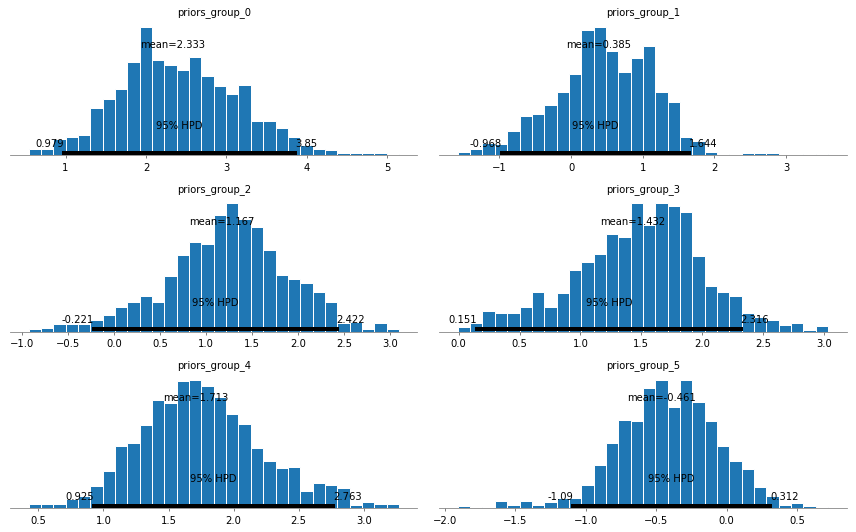

In [10]:
pm.plot_posterior(trace_logistic_model_man,varnames=['priors_group'])


plt.show()

In [11]:
measure_labels = ['self', 'old', 'young', 'man', 'kneeling_man', 'pedestrian']

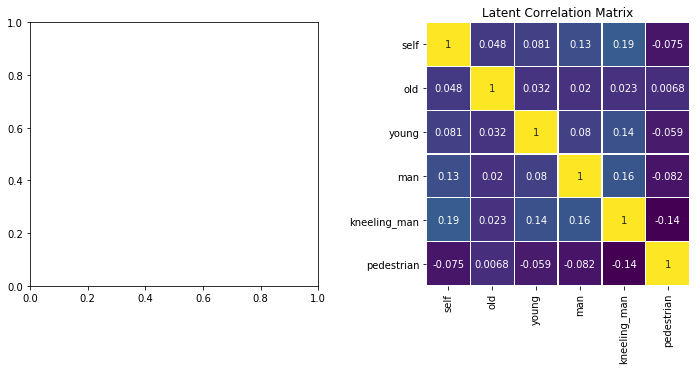

In [12]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
posterior_corr = pd.DataFrame(trace_logistic_model_man['corr_group'].mean(axis=0),
                             columns=measure_labels,
                             index=measure_labels)
sb.heatmap(posterior_corr, 
            cbar=False, square = True, annot=True, 
            linewidths=.1, cmap='viridis', ax=ax[1])
ax[1].set_title('Latent Correlation Matrix')

plt.tight_layout()
plt.show()

In [13]:
results_man = trace_logistic_model_man['priors_group']
results_man = results_man.transpose()

self_results_man = (results_man[0])
old_results_man = (results_man[1])
young_results_man = (results_man[2])
man_results_man = (results_man[3])
kneeling_results_man = (results_man[4])
pavement_results_man = (results_man[5])

print(pavement_results_man)
print(kneeling_results_man)
print(man_results_man)
print(young_results_man)
print(old_results_man)
print(self_results_man)

cov_man = trace_logistic_model_man['cov_group'].mean(axis=0)

[-3.04749365e-01 -6.65590862e-02 -1.42196055e-01 -4.24931418e-01
 -4.23577415e-01 -6.19908817e-01 -4.70543774e-01 -5.38928247e-01
 -3.77498443e-01 -3.16332786e-01 -4.29319776e-01 -5.88447021e-01
 -7.50764345e-01 -2.75356308e-01 -2.86786599e-01 -5.74685142e-01
 -3.79717480e-01 -5.18487633e-01 -2.68058866e-01 -4.33537959e-01
 -7.06475029e-02 -2.94089301e-01 -4.62417689e-01 -2.37154337e-01
 -2.58245703e-01 -1.95190070e-01  9.15463719e-03 -3.01279449e-01
 -2.68803680e-01 -3.72669019e-01 -4.82334656e-01 -6.37569381e-01
 -7.64474370e-01 -4.21281147e-01 -6.87201524e-01 -1.22936551e+00
 -5.14643102e-01 -6.03980085e-01 -6.12622197e-01 -4.76368084e-01
 -6.79907726e-01 -4.68503177e-01 -5.18784160e-01 -8.88806464e-01
 -8.75481288e-01 -5.59344548e-01 -9.32202521e-01 -1.03297120e+00
 -1.06906951e+00 -1.39012486e+00 -1.06109779e+00 -1.19645625e+00
 -9.42693194e-01 -9.31136370e-01 -8.23746177e-01 -5.93934844e-01
 -2.48040849e-01 -3.32115290e-01 -1.87252362e-01 -5.03663320e-02
 -7.86217668e-02 -2.47973

In [14]:
val = len(woman_data)/14

new_data = np.array(woman_data).reshape(int(val),14)


a = "t"
b = "stay_sv"
c = "stay_ov"
d = "stay_yv"
e = "stay_mv"
f = "stay_kv"
g = "stay_pv"

h = "switch_sv"
i = "switch_ov"
j = "switch_yv"
k = "switch_mv"
l = "switch_kv"
m = "switch_pv"
n = "c"

l = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]

df = pd.DataFrame(new_data, columns = l)


indiv_traces = {}



#c_data = df.loc[df['t'] == 0]
c_data = df
c_data = c_data.reset_index(drop=True)

stay_sv = c_data["stay_sv"]
stay_ov = c_data["stay_ov"]
stay_yv = c_data["stay_yv"]
stay_mv = c_data["stay_mv"]
stay_kv = c_data["stay_kv"]
stay_pv = c_data["stay_pv"]


switch_sv = c_data["switch_sv"]
switch_ov = c_data["switch_ov"]
switch_yv = c_data["switch_yv"]
switch_mv = c_data["switch_mv"]
switch_kv = c_data["switch_kv"]
switch_pv = c_data["switch_pv"]

choice = c_data["c"]

print(c_data)

n_testers = len(c_data['t'].unique())
#n_testers = 160
testers_idx = c_data['t'].values
n_tests = len(c_data['c'])
print(n_testers)

      t  stay_sv  stay_ov  stay_yv  stay_mv  stay_kv  stay_pv  switch_sv  \
0     0        0        0        0        2        0        0          0   
1     0        0        0        0        7        0        0          0   
2     0        0        0        0        6        0        0          1   
3     0        0        0        0        0        0        0          0   
4     0        1        0        0        0        0        0          0   
5     0        0        0        1        0        0        0          0   
6     0        0        0        1        0        0        0          0   
7     0        1        0        0        0        0        0          0   
8     0        0        0        0        0        1        0          0   
9     0        0        0        0        6        0        0          0   
10    0        0        0        1        0        0        0          0   
11    0        0        0        0        6        0        0          0   
12    0     

In [15]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))


with pm.Model() as logistic_model:
    
    sd_dist = pm.Normal.dist(mu=1, sd=0.1, shape=(6))


    chol_packed = pm.LKJCholeskyCov('chol_packed', n=6, eta=3, sd_dist=sd_dist)
    chol = pm.expand_packed_triangular(6,chol_packed)
    cov = pm.Deterministic('cov', chol.dot(chol.T))
    sad = pm.Deterministic('sad', tt.sqrt(tt.diag(cov)))
    corr = pm.Deterministic('corr', tt.diag(sad**-1).dot(cov.dot(tt.diag(sad**-1))))
    
    chol_packed_group = pm.LKJCholeskyCov('chol_packed_group', n=6, eta=3, sd_dist=sd_dist)
    chol_group = pm.expand_packed_triangular(6,chol_packed_group)
    cov_group = pm.Deterministic('cov_group', chol_group.dot(chol_group.T))
    sad_group = pm.Deterministic('sad_group', tt.sqrt(tt.diag(cov_group)))
    corr_group = pm.Deterministic('corr_group', tt.diag(sad_group**-1).dot(cov_group.dot(tt.diag(sad_group**-1))))
    
    #chosen_sd = pm.HalfCauchy('chosen_sd', 10)
    #closer_sd = pm.HalfCauchy('closer_sd', 2.5)
    
    self_group_prior = pm.Normal('self_group_prior', mu=0.,sd=1)
    old_group_prior = pm.Normal('old_group_prior', mu=0.,sd=1)
    young_group_prior = pm.Normal('young_group_prior', mu=0.,sd=1)
    man_group_prior = pm.Normal('man_group_prior', mu=0.,sd=1)
    kneeling_group_prior = pm.Normal('kneeling_group_prior', mu=0.,sd=1)
    pavement_group_prior = pm.Normal('pavement_group_prior', mu=0.,sd=1)
    
    
    priors_raw = tt.concatenate([[self_group_prior], [old_group_prior], [young_group_prior], [man_group_prior], [kneeling_group_prior], [pavement_group_prior]])
    priors_raw_ = priors_raw.T
    priors_group = pm.Deterministic('priors_group', tt.dot(priors_raw,chol_group))
    priors_group = tt.reshape(priors_group, (1,6))
   
    
    
    B0 = pm.Normal('B0', mu=priors_group[0,0], sd=1, shape=n_testers)
    B1 = pm.Normal('B1', mu=priors_group[0,1], sd=1, shape=n_testers)
    B2 = pm.Normal('B2', mu=priors_group[0,2], sd=1, shape=n_testers)
    B3 = pm.Normal('B3', mu=priors_group[0,3], sd=1, shape=n_testers)
    B4 = pm.Normal('B4', mu=priors_group[0,4], sd=1, shape=n_testers)
    B5 = pm.Normal('B5', mu=priors_group[0,5], sd=1, shape=n_testers)
    
    vals_raw = tt.concatenate([[B0], [B1], [B2], [B3], [B4], [B5]])
    vals_raw = vals_raw.T
    priors = pm.Deterministic('priors', tt.dot(vals_raw,chol))
    #priors = vals_raw
    priors = tt.reshape(priors, (n_testers,6))
    

    switch_utility = pm.Deterministic('switch_utility', ((priors[testers_idx,0] * stay_sv) + (priors[testers_idx,1] * stay_ov) + (priors[testers_idx,2] * stay_yv) + (priors[testers_idx,3] * stay_mv) + (priors[testers_idx,4] * stay_kv) + (priors[testers_idx,5] * stay_pv) ))
    stay_utility = pm.Deterministic('stay_utility', ((priors[testers_idx,0] * switch_sv) + (priors[testers_idx,1] * switch_ov) + (priors[testers_idx,2] * switch_yv) + (priors[testers_idx,3] * switch_mv) + (priors[testers_idx,4] * switch_kv) + (priors[testers_idx,5] * switch_pv) ))   
    
    overall_utility = pm.Deterministic('overall_utility', switch_utility - stay_utility)
    
    p = invlogit(overall_utility)

    
    y_obs = pm.Bernoulli('y_obs', p=p, observed=choice)

        
    #start = pm.find_MAP(model=logistic_model)
    #trace_logistic_model = pm.sample(500, start = start, chains=2, tune=500,
                         #nuts_kwargs=dict(target_accept=.8))
    trace_logistic_model_woman = pm.sample(500, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [B5, B4, B3, B2, B1, B0, pavement_group_prior, kneeling_group_prior, man_group_prior, young_group_prior, old_group_prior, self_group_prior, chol_packed_group_cholesky_cov_packed__, chol_packed_cholesky_cov_packed__]
100%|██████████| 1000/1000 [01:53<00:00,  8.77it/s]
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(

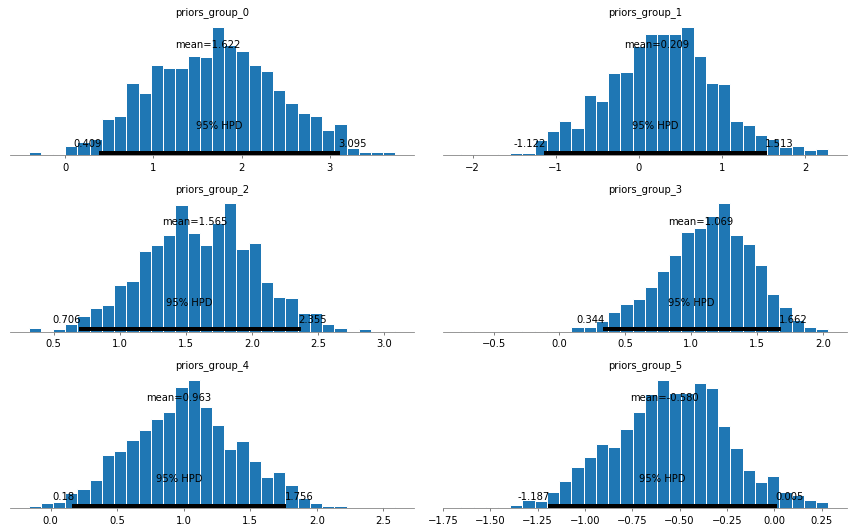

In [16]:
pm.plot_posterior(trace_logistic_model_woman,varnames=['priors_group'])


plt.show()

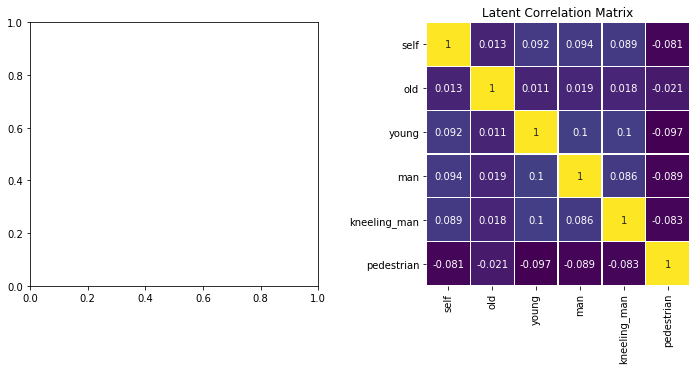

In [17]:
_, ax = plt.subplots(1, 2, figsize=(10, 5))
posterior_corr = pd.DataFrame(trace_logistic_model_woman['corr_group'].mean(axis=0),
                             columns=measure_labels,
                             index=measure_labels)
sb.heatmap(posterior_corr, 
            cbar=False, square = True, annot=True, 
            linewidths=.1, cmap='viridis', ax=ax[1])
ax[1].set_title('Latent Correlation Matrix')

plt.tight_layout()
plt.show()

In [18]:
results_woman = trace_logistic_model_woman['priors_group']
results_woman = results_woman.transpose()

self_results_woman = (results_woman[0])
old_results_woman = (results_woman[1])
young_results_woman = (results_woman[2])
man_results_woman = (results_woman[3])
kneeling_results_woman = (results_woman[4])
pavement_results_woman = (results_woman[5])


cov_woman = trace_logistic_model_woman['cov_group'].mean(axis=0)

In [19]:
data_ids = []
tester_ids = []
level_ids = []
contexts = []
left_obstacles = []
right_obstacles = []
start_lane = []
decisions = []
gender_ids = []
gender = []

j = 0
i = 0
k = 0

In [20]:
for i in range(100,200):
    tree = etree.parse('log'+ str(i) + '.xml')
    root = tree.getroot()
    for child in root:
        if child.find('stagetype') == None:
            continue
        elif child.find('stagetype').text == 'trial':
            data_ids.append(j)
            tester_ids.append(k)
            level_ids.append(child.find('trialdescription').text)
            contexts.append(child.find('level').text)
            left_obstacles.append(child.find('leftobstacles').text)
            right_obstacles.append(child.find('rightobstacles').text)
            start_lane.append(child.find('startlane').text)
            decisions.append(child.find('answer').text)
            j += 1
        elif child.find('stagetype').text == 'q01':
            if child.find('displaytext-en').text == 'Please indicate your sex.':
                gender_ids.append(k)
                gender.append(child.find('answer').text)
    k = k + 1




In [21]:
data = []

print(len(data_ids))
x = 0
for i in range(0,100):
    data.append([])

for i in range(0,len(data_ids)):
    

    left_self_value = 0
    left_old_value = 0
    left_young_value = 0
    left_man_value = 0
    left_kneeling_value = 0
    left_pavement_value = 0
    
    right_self_value = 0
    right_old_value = 0
    right_young_value = 0
    right_man_value = 0
    right_kneeling_value = 0
    right_pavement_value = 0
    
    switch_self_value = 0
    switch_old_value = 0
    switch_young_value = 0
    switch_man_value = 0
    switch_kneeling_value = 0
    switch_pavement_value = 0
    
    stay_self_value = 0
    stay_old_value = 0
    stay_young_value = 0
    stay_man_value = 0
    stay_kneeling_value = 0
    stay_pavement_value = 0
    
    
    choice = 0 
    result = []
    if contexts[i] == "mountain":
        ### left obstacle:
        
        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = 1
            left_kneeling_value = 0
            left_pavement_value = 0
        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,0]
            left_self_value = 0
            left_old_value = 0
            left_young_value = 0
            left_man_value = int(man_number)
            left_kneeling_value = 0
            left_pavement_value = 0
        level = level_ids[i].split('.')
        if level[0] == '2':
            #right = [1,0,0,0,0,0]
            right_self_value = 1

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right_man_value = [0,0,0,1,0,0]
                right_man_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                right_man_value = int(man_number)


    elif contexts[i] == "cityr":
        man_boy = left_obstacles[i][0]
        if man_boy == "b":
            boy_var = left_obstacles[i].split('y')
            if boy_var[1] == ",":
                #left = [0,0,1,0,0,0]
                left_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #left = [0,0,int(boy_number),0,0,0]
                left_young_value = int(boy_number)
        else:
            man_var = left_obstacles[i].split('n')
            if man_var[1] == ",":
                #left = [0,0,0,1,0,0]
                left_man_value = 1
            else:
                man_number = man_var[1][0]
                #left = [0,0,0,int(man_number),0,0]
                #left = [0,0,0,1,0,0]
                left_man_value = int(man_number)

        man_var = right_obstacles[i].split('n')
        if man_var[1] == ",":
            #right = [0,0,0,1,0,1]
            right_man_value = 1
            right_pavement_value = 1
        else:
            man_number = man_var[1][0]
            #right = [0,0,0,1,0,1]
            right_man_value = int(man_number)
            right_pavement_value = 1


    elif contexts[i] == "cityl":
        man_boy = right_obstacles[i][0]
        if man_boy == "b":
            boy_var = right_obstacles[i].split('y')
            if boy_var[1] == ",":
                #right = [0,0,1,0,0,0]
                right_young_value = 1
            else:
                boy_number = boy_var[1][0]
                #right = [0,0,int(boy_number),0,0,0]
                #right = [0,0,1,0,0,0]
                right_young_value = int(boy_number)

        else:
            man_var = right_obstacles[i].split('n')
            if man_var[1] == ",":
                #right = [0,0,0,1,0,0]
                right_pavement_value = 1
            else:
                man_number = man_var[1][0]
                #right = [0,0,0,int(man_number),0,0]
                #right = [0,0,0,1,0,0]
                right_man_value = int(man_number)

        man_var = left_obstacles[i].split('n')
        if man_var[1] == ",":
            #left = [0,0,0,1,0,1]
            left_man_value = 1
            left_pavement_value = 1

        else:
            man_number = man_var[1][0]
            #left = [0,0,0,int(man_number),0,1]	
            #left = [0,0,0,1,0,1]
            left_man_value = int(man_number)
            left_pavement_value = 1	
    else:
        if left_obstacles[i] == "boy,":
            #left = [0,0,1,0,0,0]
            left_young_value = 1
        elif left_obstacles[i] == "oldman,":
            #eft = [0,1,0,0,0,0]
            left_old_value = 1
        elif left_obstacles[i] == "kneelingman,":
            #eft = [0,0,0,0,1,0]
            left_kneeling_value = 1
        elif left_obstacles[i] == "man,":
            #left = [0,0,0,1,0,0]
            left_man_value = 1

        if right_obstacles[i] == "boy,":
            #right = [0,0,1,0,0,0]
            right_young_value = 1
        elif right_obstacles[i] == "oldman,":
            #right = [0,1,0,0,0,0]
            right_old_value = 1
        elif right_obstacles[i] == "kneelingman,":
            #right = [0,0,0,0,1,0]
            right_kneeling_value = 1
        elif right_obstacles[i] == "man,":
            #right = [0,0,0,1,0,0]
            right_man_value = 1


    ###### switch = 1 stay = 0      
    if(decisions[i] == "right"):
        if start_lane[i] == "left":
            choice = 1
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 0
            
                
            switch_self_value = left_self_value
            switch_old_value = left_old_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value
            
            
    else:
        if start_lane[i] == "left":
            choice = 0
            
            switch_self_value = right_self_value
            switch_old_value = right_old_value
            switch_young_value = right_young_value
            switch_man_value = right_man_value
            switch_kneeling_value = right_kneeling_value
            switch_pavement_value = right_pavement_value
            
            stay_self_value = left_self_value
            stay_old_value = left_old_value
            stay_young_value = left_young_value
            stay_man_value = left_man_value
            stay_kneeling_value = left_kneeling_value
            stay_pavement_value = left_pavement_value
        else:
            choice = 1
            
            switch_old_value = left_old_value
            switch_self_value = left_self_value
            switch_young_value = left_young_value
            switch_man_value = left_man_value
            switch_kneeling_value = left_kneeling_value
            switch_pavement_value = left_pavement_value
            
            stay_self_value = right_self_value
            stay_old_value = right_old_value
            stay_young_value = right_young_value
            stay_man_value = right_man_value
            stay_kneeling_value = right_kneeling_value
            stay_pavement_value = right_pavement_value

    """result.append(data_ids[i])
    result.append(tester_ids[i])
    result.append(left)
    result.append(right)
    result.append(choice)"""
    
    
    if tester_ids[i] in gender_ids:
        
        if tester_ids[i] == 0:
            print("hi")
        
        elif tester_ids[i - 1] != tester_ids[i]:
            x = x + 1
        


    

        result.append(x)

        #stay
        result.append(stay_self_value)
        result.append(stay_old_value)
        result.append(stay_young_value)
        result.append(stay_man_value)
        result.append(stay_kneeling_value)
        result.append(stay_pavement_value)

        #switch
        result.append(switch_self_value)
        result.append(switch_old_value)
        result.append(switch_young_value)
        result.append(switch_man_value)
        result.append(switch_kneeling_value)
        result.append(switch_pavement_value)

        result.append(choice)




        data[tester_ids[i]].append(result)

2400
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi
hi


In [22]:
data_orig = []
print(data)
for i in range(0,len(data)):
    if data[i] == []:
        print(i)
        continue
    else:
        data_orig.append([])

x = 0

for i in range(0,len(data)):
    if data[i] == []:
        continue
    else:
        for j in data[i]:            
            data_orig[x].append(j)
        x = x + 1
    
    


[[[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0], [0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
data = []
data_new_test = []

for i in data_orig:
    for j in range(len(i)):
        data.append(i[j])





In [24]:
data_test = []

for j in range(0,len(data)):
    for i in data[j]:
        data_test.append(i)

print(len(data_test))

print(data_test)

33264
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 

In [25]:
val = len(data_test)/14

new_data = np.array(data_test).reshape(int(val),14)




a = "t"
b = "stay_sv"
c = "stay_ov"
d = "stay_yv"
e = "stay_mv"
f = "stay_kv"
g = "stay_pv"

h = "switch_sv"
i = "switch_ov"
j = "switch_yv"
k = "switch_mv"
l = "switch_kv"
m = "switch_pv"
n = "c"

l = [a,b,c,d,e,f,g,h,i,j,k,l,m,n]

df = pd.DataFrame(new_data, columns = l)


indiv_traces = {}



#c_data = df.loc[df['t'] == 0]
c_data = df
#c_data = c_data.reset_index(drop=True)

stay_sv = c_data["stay_sv"]
stay_ov = c_data["stay_ov"]
stay_yv = c_data["stay_yv"]
stay_mv = c_data["stay_mv"]
stay_kv = c_data["stay_kv"]
stay_pv = c_data["stay_pv"]


switch_sv = c_data["switch_sv"]
switch_ov = c_data["switch_ov"]
switch_yv = c_data["switch_yv"]
switch_mv = c_data["switch_mv"]
switch_kv = c_data["switch_kv"]
switch_pv = c_data["switch_pv"]

choice = c_data["c"]

print(c_data)

n_testers = len(c_data['t'].unique())
#n_testers = 160
testers_idx = c_data['t'].values
n_tests = len(c_data['c'])
print(n_testers)

       t  stay_sv  stay_ov  stay_yv  stay_mv  stay_kv  stay_pv  switch_sv  \
0      0        0        0        1        0        0        0          0   
1      0        0        0        1        0        0        0          0   
2      0        1        0        0        0        0        0          0   
3      0        0        0        0        6        0        0          1   
4      0        0        0        0        3        0        0          1   
5      0        0        0        0        1        0        0          0   
6      0        0        0        0        1        0        0          0   
7      0        0        1        0        0        0        0          0   
8      0        0        0        0        6        0        0          0   
9      0        1        0        0        0        0        0          0   
10     0        0        0        0        0        1        0          0   
11     0        0        0        0        1        0        0          0   

In [26]:
def invlogit(x):
    return 1 / (1 + np.exp(-x))


with pm.Model() as logistic_model:
    
    sd_dist = pm.Normal.dist(mu=1, sd=0.1, shape=(6))


    chol_packed = pm.LKJCholeskyCov('chol_packed', n=6, eta=2, sd_dist=sd_dist)
    chol = pm.expand_packed_triangular(6,chol_packed)
    cov = pm.Deterministic('cov', chol.dot(chol.T))
    sad = pm.Deterministic('sad', tt.sqrt(tt.diag(cov)))
    corr = pm.Deterministic('corr', tt.diag(sad**-1).dot(cov.dot(tt.diag(sad**-1))))
    
    chol_packed_group = pm.LKJCholeskyCov('chol_packed_group', n=6, eta=2, sd_dist=sd_dist)
    chol_group = pm.expand_packed_triangular(6,chol_packed_group)
    cov_group = pm.Deterministic('cov_group', chol_group.dot(chol_group.T))
    sad_group = pm.Deterministic('sad_group', tt.sqrt(tt.diag(cov_group)))
    corr_group = pm.Deterministic('corr_group', tt.diag(sad_group**-1).dot(cov_group.dot(tt.diag(sad_group**-1))))
    
    #chosen_sd = pm.HalfCauchy('chosen_sd', 10)
    #closer_sd = pm.HalfCauchy('closer_sd', 2.5)
    
    self_group_prior = pm.Normal('self_group_prior', mu=0.,sd=1)
    old_group_prior = pm.Normal('old_group_prior', mu=0.,sd=1)
    young_group_prior = pm.Normal('young_group_prior', mu=0.,sd=1)
    man_group_prior = pm.Normal('man_group_prior', mu=0.,sd=1)
    kneeling_group_prior = pm.Normal('kneeling_group_prior', mu=0.,sd=1)
    pavement_group_prior = pm.Normal('pavement_group_prior', mu=0.,sd=1)
    
    
    priors_raw = tt.concatenate([[self_group_prior], [old_group_prior], [young_group_prior], [man_group_prior], [kneeling_group_prior], [pavement_group_prior]])
    priors_raw_ = priors_raw.T
    priors_group = pm.Deterministic('priors_group', tt.dot(priors_raw,chol_group))
    priors_group = tt.reshape(priors_group, (1,6))
   
    
    
    B0 = pm.Normal('B0', mu=priors_group[0,0], sd=1, shape=n_testers)
    B1 = pm.Normal('B1', mu=priors_group[0,1], sd=1, shape=n_testers)
    B2 = pm.Normal('B2', mu=priors_group[0,2], sd=1, shape=n_testers)
    B3 = pm.Normal('B3', mu=priors_group[0,3], sd=1, shape=n_testers)
    B4 = pm.Normal('B4', mu=priors_group[0,4], sd=1, shape=n_testers)
    B5 = pm.Normal('B5', mu=priors_group[0,5], sd=1, shape=n_testers)
    
    vals_raw = tt.concatenate([[B0], [B1], [B2], [B3], [B4], [B5]])
    vals_raw = vals_raw.T
    priors = pm.Deterministic('priors', tt.dot(vals_raw,chol))
    priors = tt.reshape(priors, (n_testers,6))
    

    switch_utility = pm.Deterministic('switch_utility', ((priors[testers_idx,0] * stay_sv) + (priors[testers_idx,1] * stay_ov) + (priors[testers_idx,2] * stay_yv) + (priors[testers_idx,3] * stay_mv) + (priors[testers_idx,4] * stay_kv) + (priors[testers_idx,5] * stay_pv) ))
    stay_utility = pm.Deterministic('stay_utility', ((priors[testers_idx,0] * switch_sv) + (priors[testers_idx,1] * switch_ov) + (priors[testers_idx,2] * switch_yv) + (priors[testers_idx,3] * switch_mv) + (priors[testers_idx,4] * switch_kv) + (priors[testers_idx,5] * switch_pv) ))   
    
    overall_utility = pm.Deterministic('overall_utility', switch_utility - stay_utility)
    
    p = invlogit(overall_utility)

    
    y_obs = pm.Bernoulli('y_obs', p=p, observed=choice)

        
    #start = pm.find_MAP(model=logistic_model)
    #trace_logistic_model = pm.sample(500, start = start, chains=2, tune=500,
                         #nuts_kwargs=dict(target_accept=.8))
    trace_logistic_model = pm.sample(500, chains=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [B5, B4, B3, B2, B1, B0, pavement_group_prior, kneeling_group_prior, man_group_prior, young_group_prior, old_group_prior, self_group_prior, chol_packed_group_cholesky_cov_packed__, chol_packed_cholesky_cov_packed__]
100%|██████████| 1000/1000 [06:31<00:00,  2.56it/s]
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/tortysivill/anaconda3/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(

In [52]:
results = trace_logistic_model['priors']
results = results.transpose()

self_results = results[0]
old_results = results[1]
young_results = results[2]
man_results = results[3]
kneeling_results = results[4]
pavement_results = results[5]


print(len(man_results))



99


In [53]:
man_gender_results = [self_results_man, old_results_man, young_results_man, man_results_man, kneeling_results_man, pavement_results_man]
woman_gender_results = [self_results_woman, old_results_woman, young_results_woman, man_results_woman, kneeling_results_woman, pavement_results_woman]


In [ ]:
print(stats.ks_2samp(results_woman[0],results_man[0])) # self
print(stats.ks_2samp(results_woman[1],results_man[1])) # old
print(stats.ks_2samp(results_woman[2],results_man[2])) # young

print(stats.ks_2samp(results_woman[3],results_man[3])) #man

print(stats.ks_2samp(results_woman[4],results_man[4])) #kneeling

print(stats.ks_2samp(results_woman[5],results_man[5])) #pavement



[x, y] = stats.ks_2samp(results_woman[5],results_man[5])
print(x)


In [54]:
print(len(self_results))
print(len(old_results))
print(len(young_results))
print(len(man_results))
print(len(kneeling_results))
print(len(pavement_results))

99
99
99
99
99
99


In [55]:

y = 0
summy = 0




for i in range(0,len(self_results)):
    mu = np.asarray(man_gender_results)
    sigma = np.asarray(cov_man)
    
    
    [z0, y0] = stats.ks_2samp(self_results[i],mu[0])
    [z1, y1] = stats.ks_2samp(old_results[i],mu[1])
    [z2, y2] = stats.ks_2samp(young_results[i],mu[2])
    [z3, y3] = stats.ks_2samp(man_results[i],mu[3])
    [z4, y4] = stats.ks_2samp(kneeling_results[i],mu[4])
    [z5, y5] = stats.ks_2samp(pavement_results[i],mu[5])

    result1 = z0 + z1 + z2 + z3 + z4 + z5








    

    
   # m_dist_x = np.dot((x-mu).transpose(),np.linalg.inv(sigma))
   # m_dist_x = np.dot(m_dist_x, (x-mu))
   # result1 = 1-stats.chi2.cdf(m_dist_x, 6)
    
   # result1 = (mu[4] - x[4])*(mu[4] - x[4]) + (mu[1] - x[1])*(mu[1] - x[1]) + (mu[5] - x[5])*(mu[5] - x[5]) + (mu[2] - x[5])*(mu[5] - x[5]) 
    
    mu = np.asarray(woman_gender_results)
    sigma = np.asarray(cov_woman)
   # m_dist_x = np.dot((x-mu).transpose(),np.linalg.inv(sigma))
   # m_dist_x = np.dot(m_dist_x, (x-mu))
   # result0 = 1-stats.chi2.cdf(m_dist_x, 6)
    
   # result0 = (mu[4] - x[4])*(mu[4] - x[4]) + (mu[1] - x[1])*(mu[1] - x[1]) + (mu[5] - x[5])*(mu[5] - x[5])
    
    [z0, y0] = stats.ks_2samp(self_results[i],mu[0])
    [z1, y1] = stats.ks_2samp(old_results[i],mu[1])
    [z2, y2] = stats.ks_2samp(young_results[i],mu[2])
    [z3, y3] = stats.ks_2samp(man_results[i],mu[3])
    [z4, y4] = stats.ks_2samp(kneeling_results[i],mu[4])
    [z5, y5] = stats.ks_2samp(pavement_results[i],mu[5])
    result0 = z0 + z1 + z2 + z3 + z4 + z5


    
    
    if(result1 >= result0):
        result = 1
    else:
        result = 0
    
    if result == int(gender[y]):
        summy = summy + 1
        
    
  
    y = y + 1

print(summy)

print(summy/len(gender))
    


46
0.46464646464646464
